In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('data/data.csv')
df.head()


,ID,URL,timedelta,weekday,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593,12.0,219.0,0.663594,1.0,0.815385,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711,9.0,255.0,0.604743,1.0,0.791946,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500,9.0,211.0,0.575130,1.0,0.663866,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200,9.0,531.0,0.503788,1.0,0.665635,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505,13.0,1072.0,0.415646,1.0,0.540890,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.describe()

,ID,timedelta,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
count,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,34959.000000,34959.000000,...,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000
mean,19823.468918,354.523234,3402.054961,10.395432,545.995123,0.530461,0.970263,0.672738,10.866358,3.282531,...,7.220095,26.169703,1142.296851,310.297441,13533.498851,752318.562220,259143.787814,1115.670961,5637.977838,3130.799667
std,11452.292291,214.301086,11934.878541,2.114600,469.550052,0.136935,0.169862,0.153881,11.260971,3.834065,...,1.909604,69.705812,3844.829034,616.961660,57623.779316,214391.922961,135080.424060,1136.741358,6026.965362,1311.012948
min,0.000000,8.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,9890.750000,163.000000,946.000000,9.000000,247.000000,0.471030,1.000000,0.625912,4.000000,1.000000,...,6.000000,-1.000000,445.000000,141.440476,0.000000,843300.000000,172595.650000,0.000000,3559.646658,2379.762290
50%,19801.500000,339.000000,1400.000000,10.000000,410.000000,0.539011,1.000000,0.690323,8.000000,3.000000,...,7.000000,-1.000000,658.000000,235.428571,1400.000000,843300.000000,244133.333333,1020.667532,4348.584651,2867.991456
75%,29788.250000,543.000000,2800.000000,12.000000,716.000000,0.608203,1.000000,0.754036,14.000000,4.000000,...,9.000000,4.000000,1000.000000,357.000000,7800.000000,843300.000000,330980.000000,2058.093423,6015.434738,3595.530145
max,39643.000000,731.000000,843300.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,...,10.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3610.124972,298400.000000,43567.659946


In [4]:
print("\n--- DataFrame Information (Raw Data) ---")
df.info()

print("\n--- Non-Numerical Columns ---")
non_numerical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
if non_numerical_cols:
    print(f"The following columns are non-numerical: {non_numerical_cols}")
else:
    print("All columns are numerical.")

print("\nNote: Data transformations including handling duplicates, type conversions, imputation,")
print("and encoding for these non-numerical columns (except 'URL'/'ID' if applicable)")
print("will be performed in the `data_preparation.py` script.")
print("---------------------------------------------------------------------------------\n")


--- DataFrame Information (Raw Data) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   URL                        35680 non-null  object 
 2   timedelta                  35680 non-null  float64
 3   weekday                    35680 non-null  object 
 4   shares                     35680 non-null  int64  
 5   n_tokens_title             35680 non-null  float64
 6   n_tokens_content           35680 non-null  float64
 7   n_unique_tokens            35680 non-null  float64
 8   n_non_stop_words           35680 non-null  float64
 9   n_non_stop_unique_tokens   35680 non-null  float64
 10  num_hrefs                  34959 non-null  float64
 11  num_self_hrefs             34959 non-null  float64
 12  num_imgs                   34261 non-null  float64
 13  num_


Identified categorical columns for EDA: ['weekday', 'data_channel']

--- Visualizing Categorical Feature Distributions (Count Plots) ---


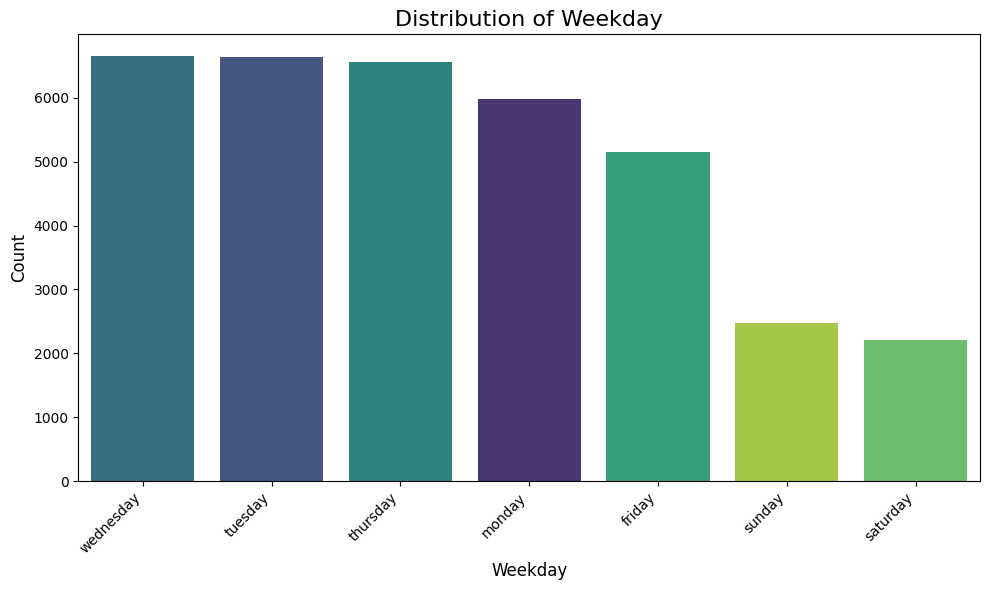

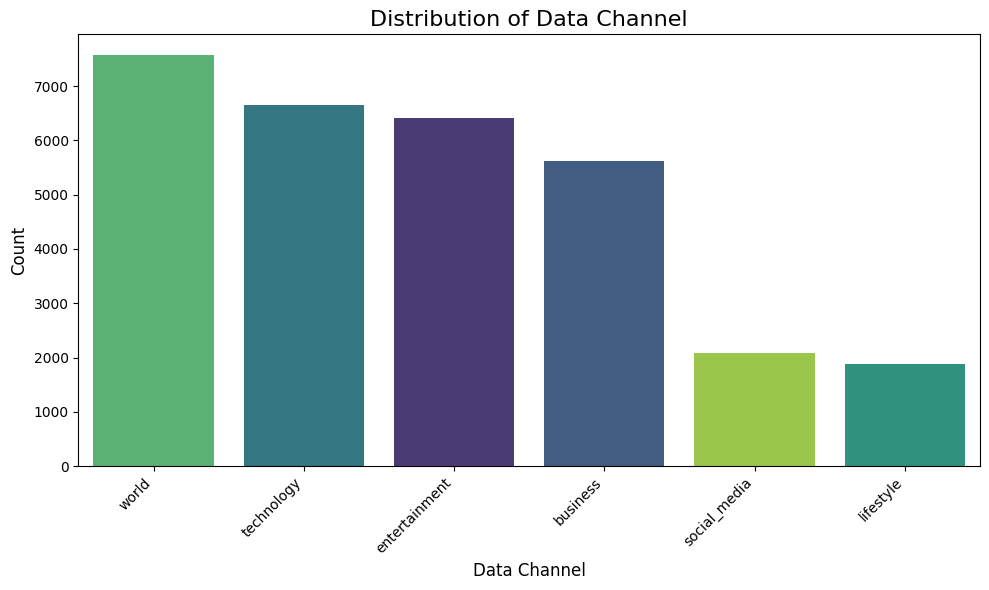


Categorical feature visualizations complete.


In [ ]:

# --- 1. Ensure DataFrame 'df' is available ---
if 'df' not in locals():
    print("Error: DataFrame 'df' is not defined. Please ensure your data loading cell has been executed.")
 
    exit() # Exit the cell if df is not available

# --- 2. Identify Categorical Columns Directly from DataFrame ---
# Automatically identify columns with 'object' dtype, which usually indicates categorical features.
# Exclude 'URL' as it's typically a unique identifier and not suitable for count plots.
all_object_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_eda = [col for col in all_object_cols if col not in ['URL', 'ID']]

print(f"\nIdentified categorical columns for EDA: {categorical_cols_for_eda}")

if not categorical_cols_for_eda:
    print("No suitable categorical columns found in DataFrame for visualization.")
else:
    print("\n--- Visualizing Categorical Feature Distributions (Count Plots) ---")
    for col in categorical_cols_for_eda:
        plt.figure(figsize=(10, 6))
        # Updated to explicitly assign 'hue' and set 'legend=False' to remove FutureWarning
        sns.countplot(data=df, x=col, hue=col, palette='viridis', order=df[col].value_counts().index, legend=False)
        plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=16)
        plt.xlabel(col.replace("_", " ").title(), fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

    print("\nCategorical feature visualizations complete.")

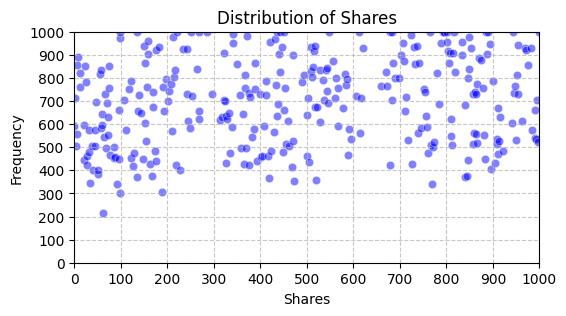

In [ ]:

# Create the histogram
plt.figure(figsize=(6, 3))
hist = sns.scatterplot(df['shares'], alpha=0.5, color='blue')
plt.xlim(0, 1000)  # Set x-axis limit to 0-1000
plt.ylim(0, 1000)  # Set y-axis limit to 0-1000
plt.xticks(np.arange(0, 1001, 100))  # Set x-ticks to multiples of 100
plt.yticks(np.arange(0, 1001, 100))  # Set y-ticks to multiples of 100
plt.grid(True, linestyle='--', alpha=0.7)
# Set the title and labels  
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.isnull().sum()

ID                               0
URL                              0
timedelta                        0
weekday                          0
shares                           0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      721
num_self_hrefs                 721
num_imgs                      1419
num_videos                   16755
n_comments                       0
average_token_length             0
data_channel                  5462
self_reference_min_shares      721
self_reference_max_shares      721
self_reference_avg_shares      721
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg          

So i will ignore the records (721) that have all those nulls in 

    num_hrefs                       721
    num_self_hrefs                  721
    self_reference_min_shares       721
    self_reference_max_shares       721
    self_reference_avg_shares       721

and for columns with nulls in 

    num_imgs                       1419
   

i will populate those columns with the median of the values in those columns

Columns data_channel and num_videos will require more analysis as they have  a signficant number of nulls.

In [6]:
#drop records with missing values in columns num_hrefs and num_self_hrefs
df.dropna(subset=['num_hrefs', 'num_self_hrefs', 'self_reference_min_shares', 'self_reference_max_shares',
                  'self_reference_avg_shares'], inplace=True)
# populate nulls in columns num_imgs, num_videos with median of the column
df = df.fillna({'num_imgs': df['num_imgs'].median()})

### Drop unwnated columns

In [7]:
#Drop "url" "ID""
df.drop(columns=['URL', 'ID'], inplace=True)

### Análisis data channels y num videos

In [ ]:
# Ensure missing values are filled for 'data_channel' and 'num_vids'
df = df.fillna({'data_channel': 'unknown', 'num_videos': 0})  

# Columns to analyze
columns = ['data_channel', 'num_videos']

# Loop through each column and calculate grouped statistics
for column in columns:
    print(f"\nGrouped statistics for column '{column}':")
    
    # Grouped means
    grouped_means = df.groupby(column)['shares'].mean()
    print("\nMean shares per group:")
    print(grouped_means)
    
    # Grouped medians
    grouped_medians = df.groupby(column)['shares'].median()
    print("\nMedian shares per group:")
    print(grouped_medians)
    
    # Aggregated statistics
    grouped_stats = df.groupby(column)['shares'].agg(['mean', 'median', 'std', 'count'])
    print("\nAggregated statistics:")
    print(grouped_stats)



Grouped statistics for column 'data_channel':

Mean shares per group:
data_channel
business         3128.696909
entertainment    2951.542130
lifestyle        3703.349404
social_media     3589.856027
technology       3074.439489
unknown          5980.993623
world            2303.766946
Name: shares, dtype: float64

Median shares per group:
data_channel
business         1400.0
entertainment    1200.0
lifestyle        1700.0
social_media     2100.0
technology       1700.0
unknown          1900.0
world            1100.0
Name: shares, dtype: float64

Aggregated statistics:
                      mean  median           std  count
data_channel                                           
business       3128.696909  1400.0  15796.620319   5533
entertainment  2951.542130  1200.0   7738.055867   6290
lifestyle      3703.349404  1700.0   9159.350599   1846
social_media   3589.856027  2100.0   5423.609119   2049
technology     3074.439489  1700.0   9455.268053   6503
unknown        5980.993623  1900

In [9]:
len(df)

34959

In [ ]:
# get data types to see if any columns are not numeric
df.dtypes   


timedelta                    float64
weekday                       object
shares                         int64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
k

In [11]:
# get column 'data_channel' value counts    
data_channel_counts = df['data_channel'].value_counts()
print("\nData channel counts:")
print(data_channel_counts)
# get column 'data_channel' value counts in descending order
data_channel_counts_desc = data_channel_counts.sort_values(ascending=False)
print("\nData channel counts (descending):")


Data channel counts:
data_channel
world            7406
technology       6503
entertainment    6290
business         5533
unknown          5332
social_media     2049
lifestyle        1846
Name: count, dtype: int64

Data channel counts (descending):


### model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # Although not strictly used in this snippet's current form, good to keep if needed

# Assuming 'df' is your original DataFrame loaded from 'data.csv'
# If you are running this after the data_preparation_script, 'df' might not be defined.
# For this snippet to run, you'd typically load the data first or have 'df' in scope.
# For demonstration purposes, let's assume 'df' is available.
# In a real scenario, you would load data here, or use the output of a data preparation script.

# --- Start of user's provided code (adjusted) ---

# Create copies to avoid modifying the original DataFrame
df_processed = df.copy()

# 1. Handle Missing Values
# Impute numerical columns with the median
numerical_cols_with_missing = [
    'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_shares'
]
for col in numerical_cols_with_missing:
    if col in df_processed.columns: # Added check for column existence
        median_val = df_processed[col].median()
        # Avoid inplace=True to prevent FutureWarnings
        df_processed[col] = df_processed[col].fillna(median_val)

# Impute 'data_channel' (categorical) with the mode
if 'data_channel' in df_processed.columns:
    mode_data_channel = df_processed['data_channel'].mode()[0]
    # Avoid inplace=True to prevent FutureWarnings
    df_processed['data_channel'] = df_processed['data_channel'].fillna(mode_data_channel)


# 2. Categorical Feature Encoding
# Identify categorical columns for one-hot encoding
categorical_cols = ['weekday', 'data_channel']

# Ensure only existing categorical columns are processed
actual_categorical_cols = [col for col in categorical_cols if col in df_processed.columns]

if actual_categorical_cols:
    df_processed = pd.get_dummies(df_processed, columns=actual_categorical_cols, drop_first=True)
else:
    print("No specified categorical columns found for one-hot encoding.")


# Define features (X) and target (y)
# Ensure 'ID' and 'URL' are dropped if they exist, as they are identifiers.
# The user's original snippet only dropped 'shares'.
cols_to_drop = ['shares']
if 'ID' in df_processed.columns:
    cols_to_drop.append('ID')
if 'URL' in df_processed.columns:
    cols_to_drop.append('URL')

X = df_processed.drop(columns=cols_to_drop)
y = df_processed['shares']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Choose and Train a Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 2511.20
Mean Squared Error (MSE): 72454606.54
Root Mean Squared Error (RMSE): 8512.03
R-squared (R2): 0.13


### feature importance

Top 10 Most Important Features:
                      Feature  Importance
10                 n_comments    0.484831
2            n_tokens_content    0.057416
11       average_token_length    0.037251
18                 kw_avg_min    0.032086
23                 kw_max_avg    0.030341
0                   timedelta    0.026626
7              num_self_hrefs    0.024647
12  self_reference_min_shares    0.023547
17                 kw_max_min    0.023276
21                 kw_avg_max    0.023248


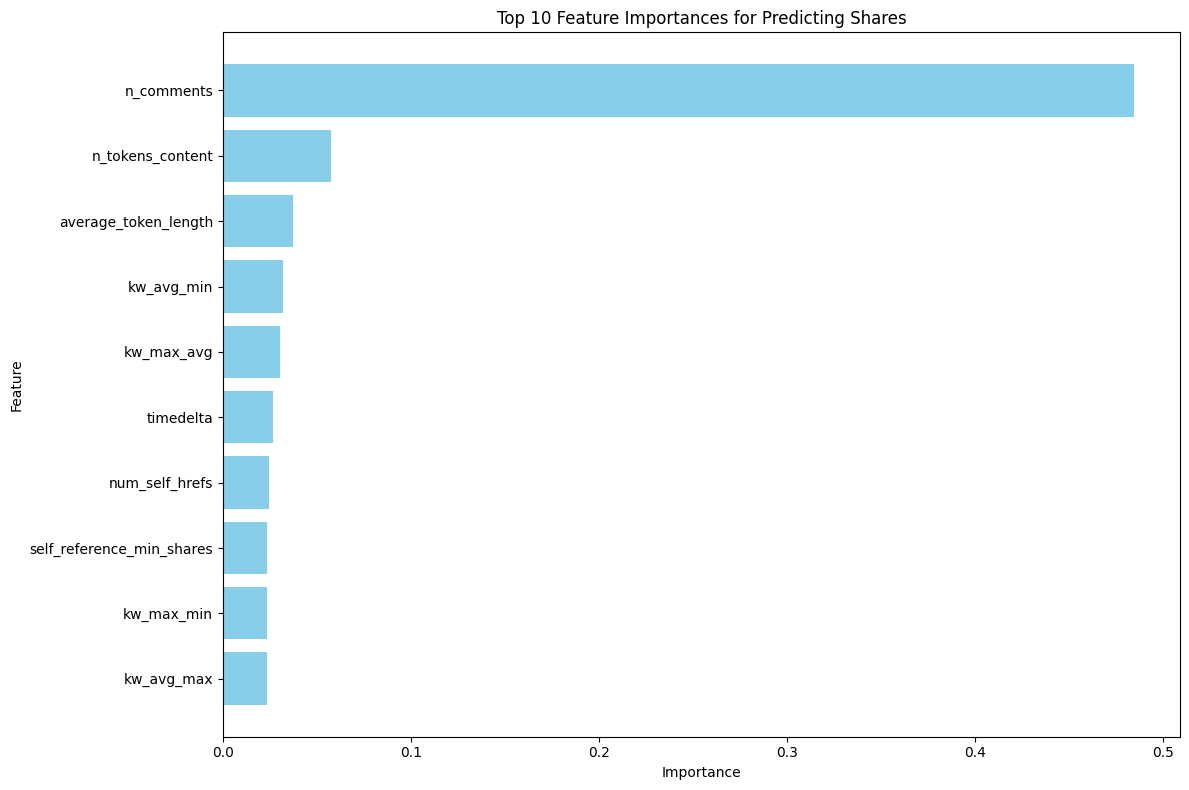

In [13]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(features_df.head(10))

# Optionally, visualize the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Predicting Shares')
plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.savefig('feature_importance.png')

Here are the top 10 most important features for predicting shares, ranked by their importance:

n_comments: 0.5076 (Number of comments by readers)
n_non_stop_unique_tokens: 0.0587 (Rate of unique non-stop words in the content)
kw_max_avg: 0.0332 (Maximum shares any article obtained with the median performing keyword in the article)
num_hrefs: 0.0275 (Number of links)
self_reference_max_shares: 0.0264 (Maximum shares of referenced articles in the news website)
kw_avg_min: 0.0250 (Average shares any article obtained with the worst performing keyword in the article)
n_tokens_content: 0.0245 (Number of words in the content)
n_tokens_title: 0.0242 (Number of words in the title)
n_unique_tokens: 0.0239 (Rate of unique words in the content)
timedelta: 0.0234 (Number of days between the article's publication and the dataset acquisition)
Key Observations:

n_comments stands out significantly: With an importance score of 0.5076, it is by far the most influential feature. This suggests that the number of comments an article receives is a very strong indicator of how many shares it will get. This could imply that highly engaging or controversial articles tend to generate both more comments and more shares.

The remaining features have much lower importance scores compared to n_comments, but still contribute to the prediction.

Features related to content richness and engagement (n_non_stop_unique_tokens, n_tokens_content, n_tokens_title, n_unique_tokens) are important. This indicates that the quality and nature of the content play a role.

Keyword performance metrics (kw_max_avg, kw_avg_min) and self-referencing shares (self_reference_max_shares) also have some predictive power, suggesting that how well associated keywords perform and the internal linking strategy of the website can influence shares.

num_hrefs (number of links) also has a notable importance, suggesting that articles with more external links might be shared more.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   URL                        35680 non-null  object 
 2   timedelta                  35680 non-null  float64
 3   weekday                    35680 non-null  object 
 4   shares                     35680 non-null  int64  
 5   n_tokens_title             35680 non-null  float64
 6   n_tokens_content           35680 non-null  float64
 7   n_unique_tokens            35680 non-null  float64
 8   n_non_stop_words           35680 non-null  float64
 9   n_non_stop_unique_tokens   35680 non-null  float64
 10  num_hrefs                  34959 non-null  float64
 11  num_self_hrefs             34959 non-null  float64
 12  num_imgs                   34261 non-null  float64
 13  num_videos                 18925 non-null  flo

### outlier analysis


--- Extended Outlier Analysis for Numerical Features ---

--- Box Plots for All Numerical Features ---


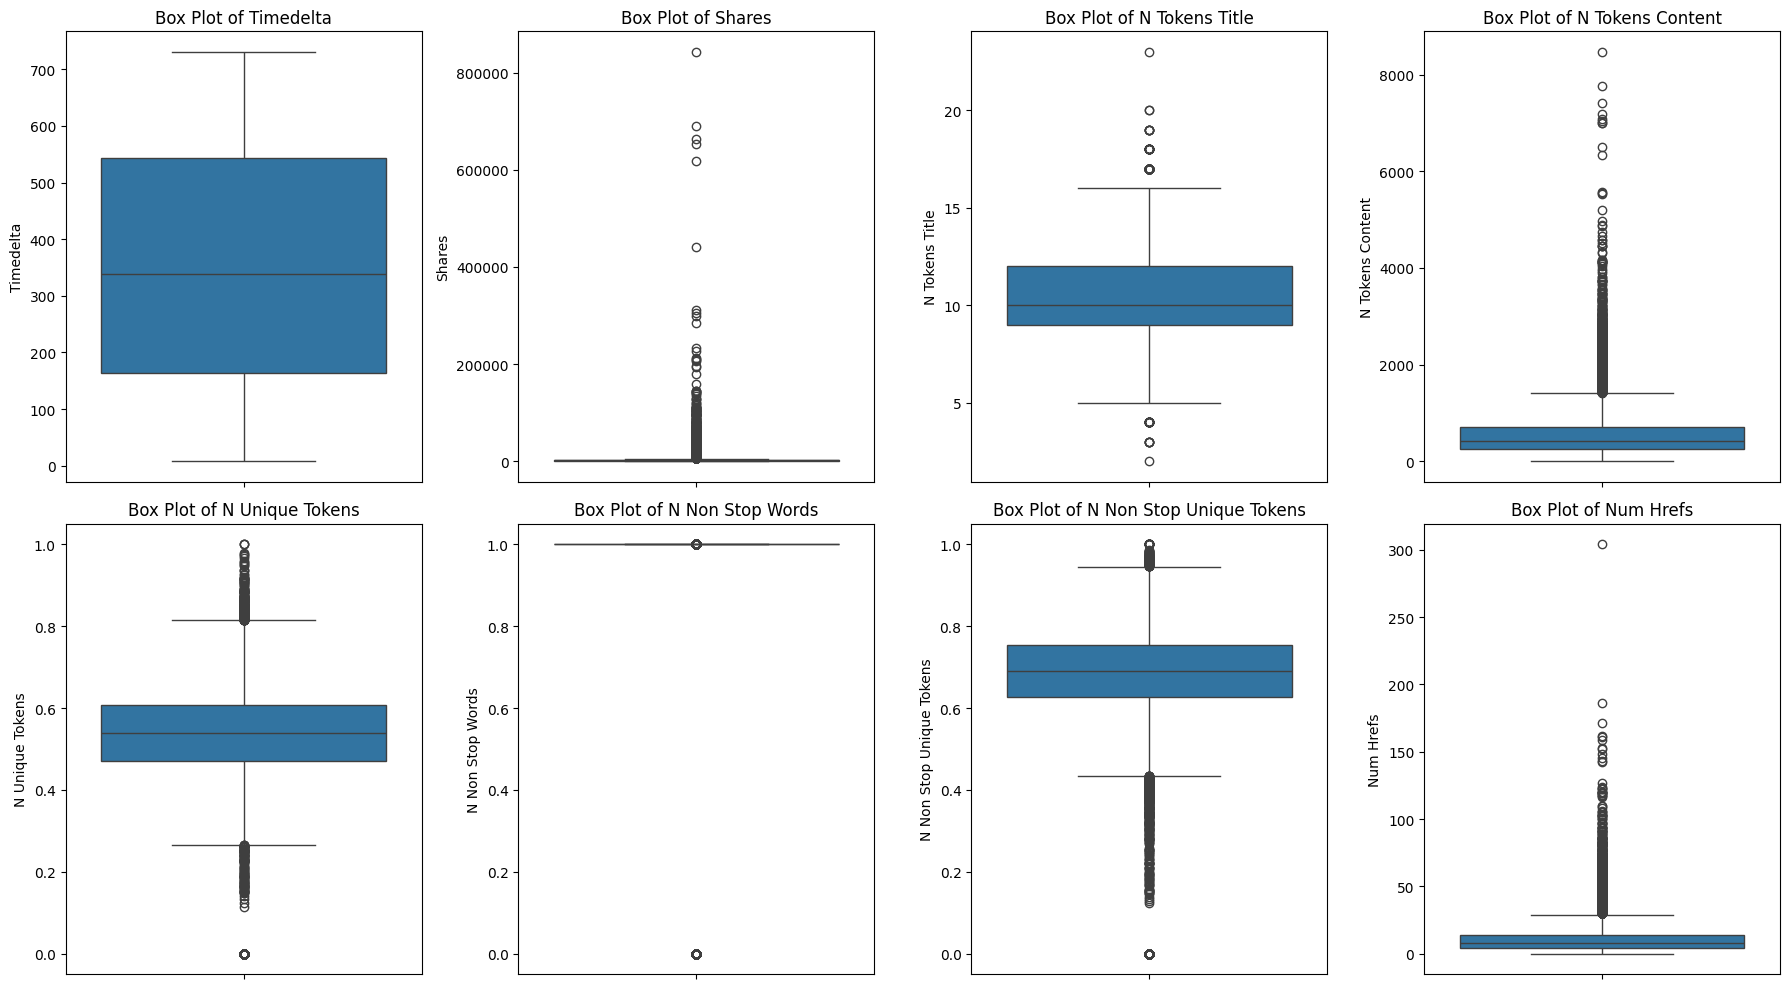

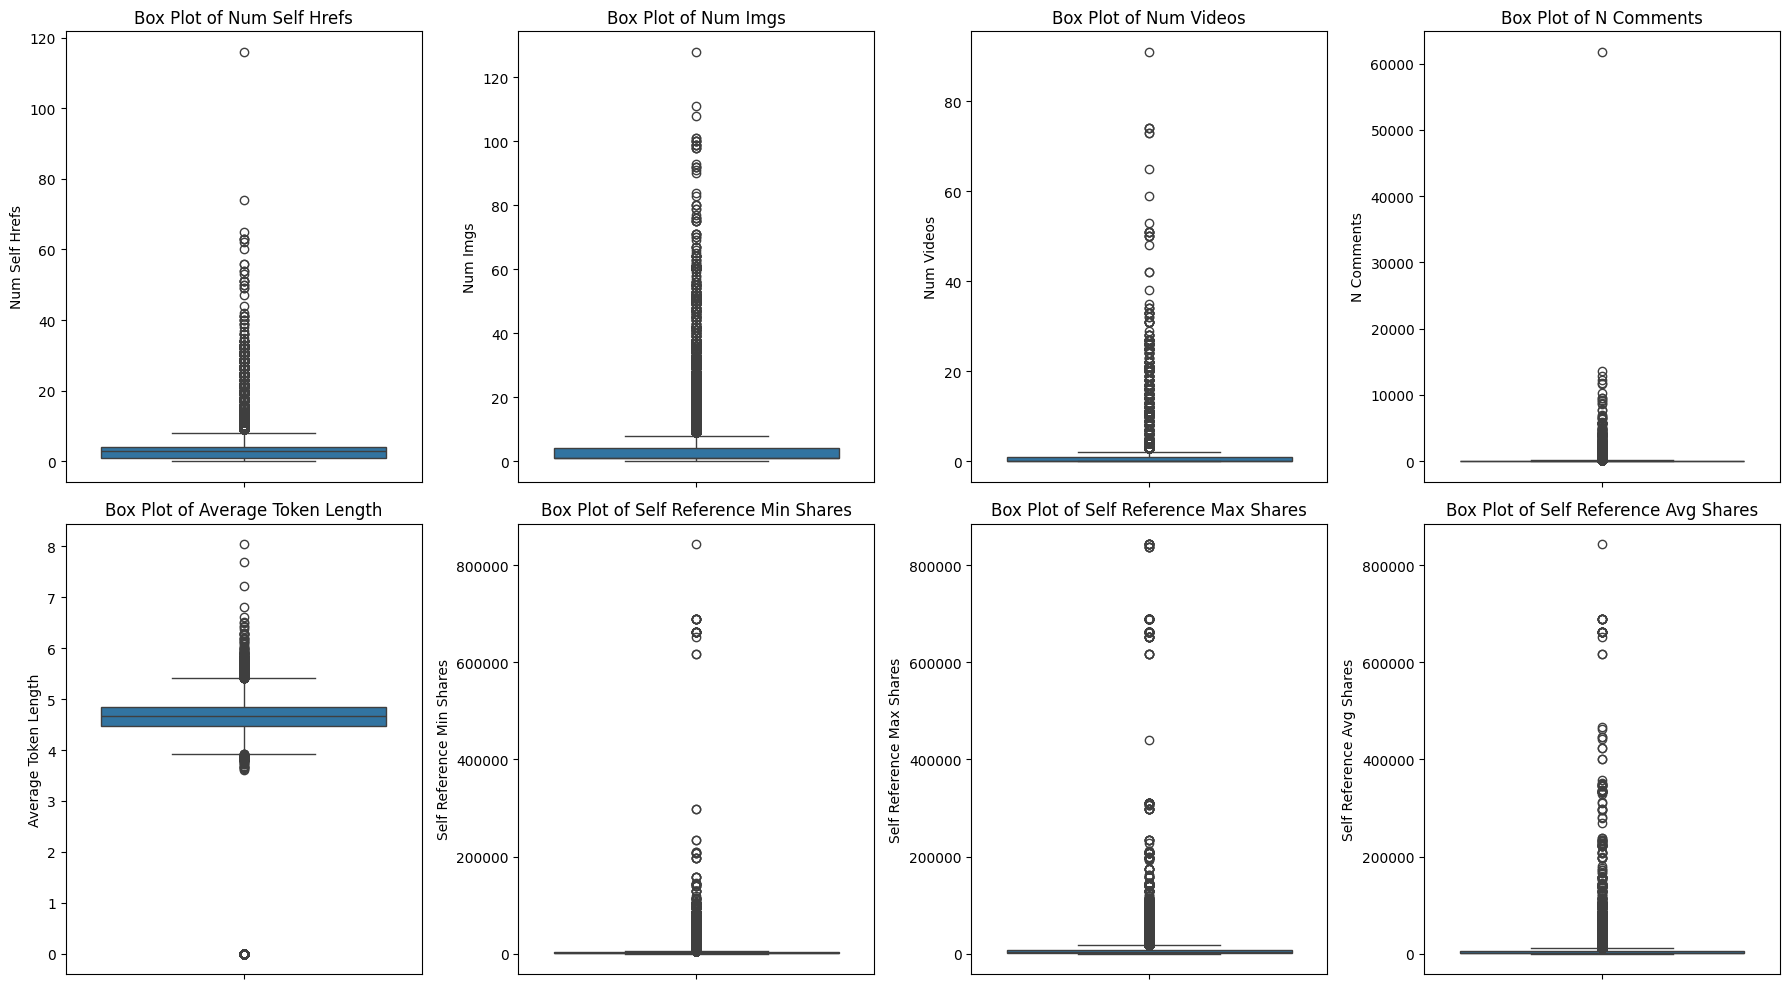

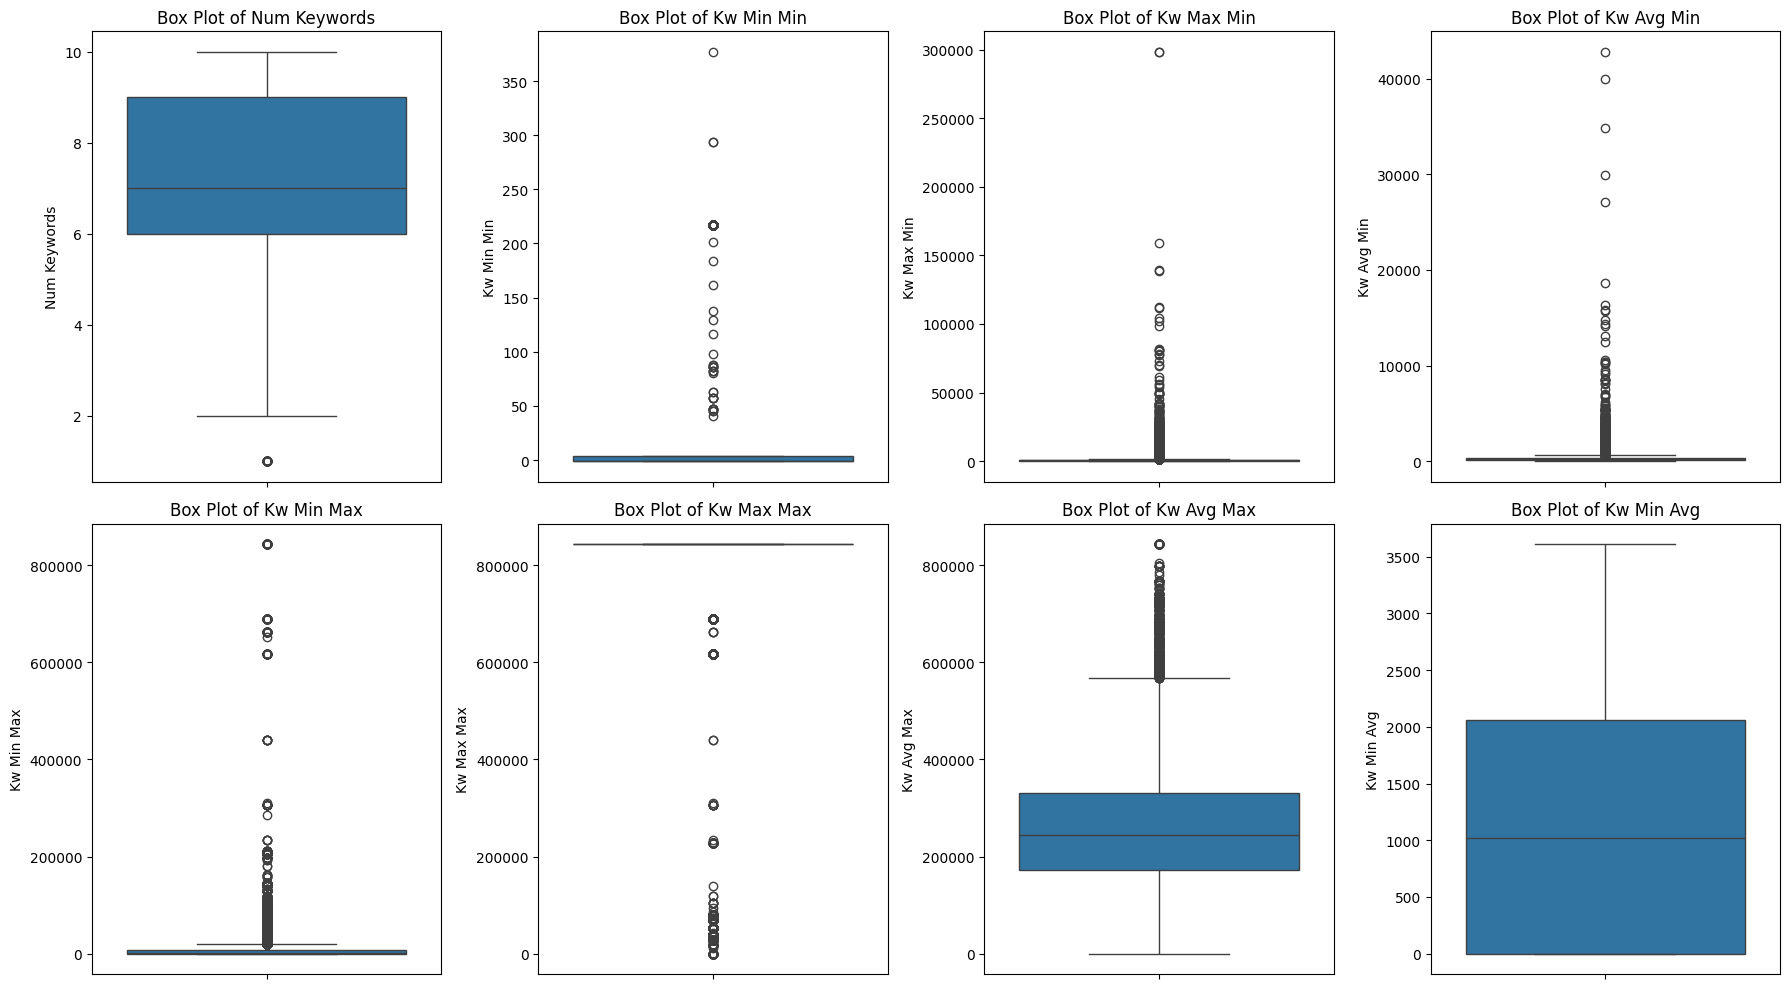

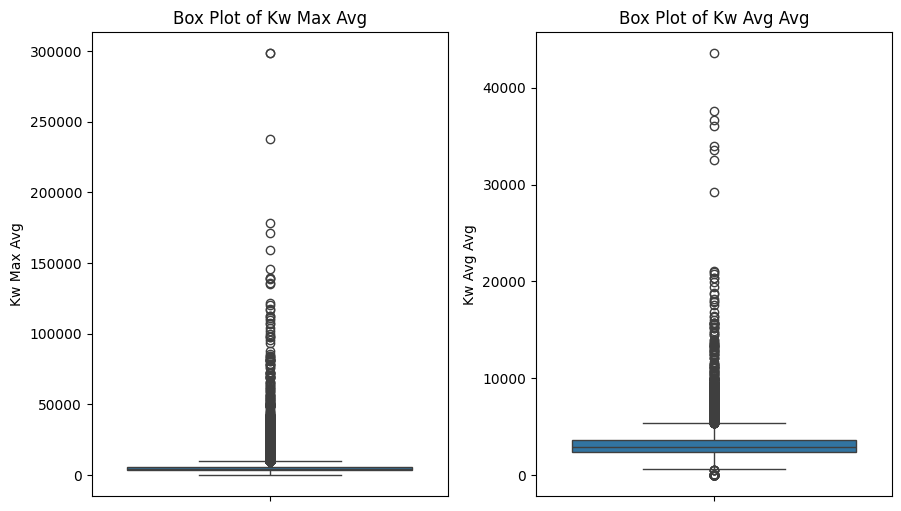


--- Descriptive Statistics for All Numerical Features ---

Descriptive Statistics for Timedelta:
count    35680.000000
mean       354.523234
std        214.301086
min          8.000000
25%        163.000000
50%        339.000000
75%        543.000000
max        731.000000

Descriptive Statistics for Shares:
count     35680.000000
mean       3402.054961
std       11934.878541
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000

Descriptive Statistics for N Tokens Title:
count    35680.000000
mean        10.395432
std          2.114600
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000

Descriptive Statistics for N Tokens Content:
count    35680.000000
mean       545.995123
std        469.550052
min          0.000000
25%        247.000000
50%        410.000000
75%        716.000000
max       8474.000000

Descriptive Statistics for N Unique Tokens:
count    35680.0000

In [8]:

# --- Outlier Analysis Extension: Box Plots and Statistics for All Numerical Features ---
print("\n--- Extended Outlier Analysis for Numerical Features ---")

# Identify all numerical columns for outlier analysis
# Exclude 'ID' as it's just an identifier
numerical_features_for_outliers = df.select_dtypes(include=np.number).columns.tolist()
numerical_features_for_outliers = [col for col in numerical_features_for_outliers if col not in ['ID']]

if not numerical_features_for_outliers:
    print("\nNo numerical columns found for outlier analysis.")
else:
    print("\n--- Box Plots for All Numerical Features ---")
    
    # Define how many plots per figure
    n_cols_per_row = 4
    n_rows_per_figure = 2
    plots_per_figure = n_cols_per_row * n_rows_per_figure
    
    num_plots = len(numerical_features_for_outliers)
    num_figures = (num_plots + plots_per_figure - 1) // plots_per_figure # Ceiling division

    for fig_idx in range(num_figures):
        plt.figure(figsize=(18, 5 * n_rows_per_figure)) # Adjust figure size dynamically
        
        start_idx = fig_idx * plots_per_figure
        end_idx = min(start_idx + plots_per_figure, num_plots)
        
        for i, col_idx in enumerate(range(start_idx, end_idx)):
            col = numerical_features_for_outliers[col_idx]
            subplot_position = i + 1 # Subplot starts from 1
            
            plt.subplot(n_rows_per_figure, n_cols_per_row, subplot_position)
            sns.boxplot(y=df[col])
            plt.title(f'Box Plot of {col.replace("_", " ").title()}')
            plt.ylabel(col.replace("_", " ").title())
            
        plt.tight_layout() # Adjust layout for each figure
        # Save each figure if desired
        # plt.savefig(f'outlier_analysis_part_{fig_idx+1}.png')
        plt.show()

    print("\n--- Descriptive Statistics for All Numerical Features ---")
    for col in numerical_features_for_outliers:
        print(f"\nDescriptive Statistics for {col.replace('_', ' ').title()}:")
        print(df[col].describe().to_string())


--- Histograms for All Numerical Features ---


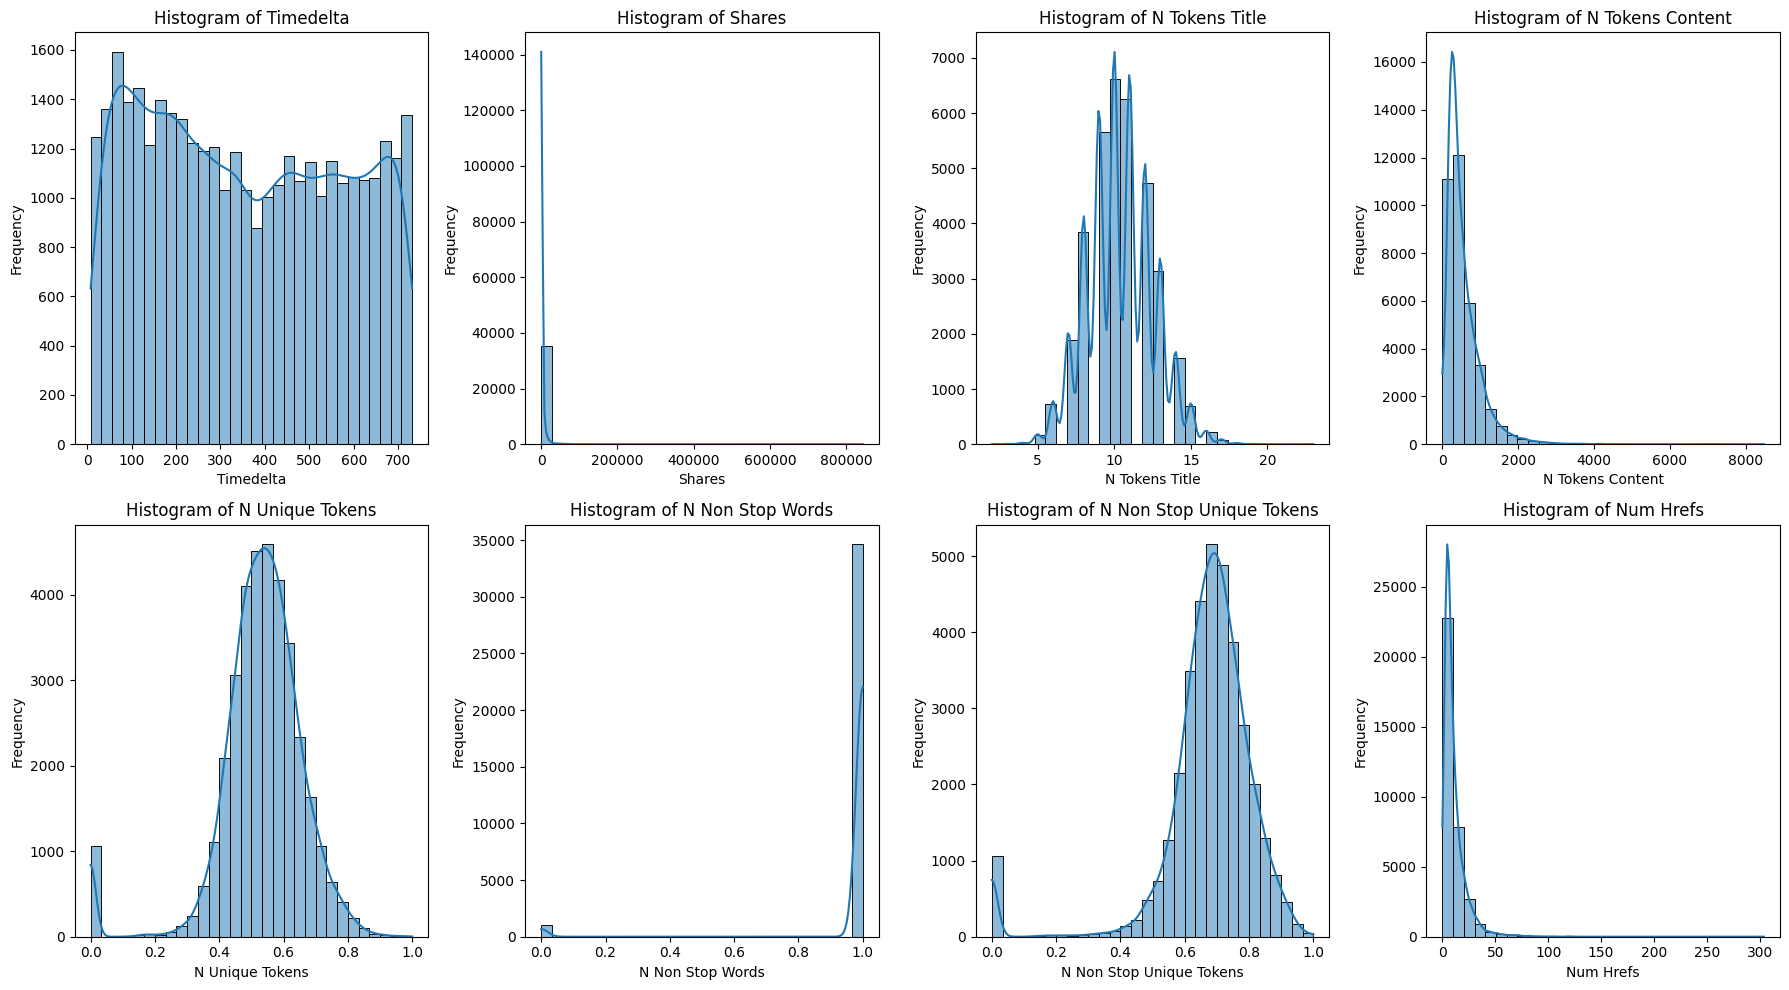

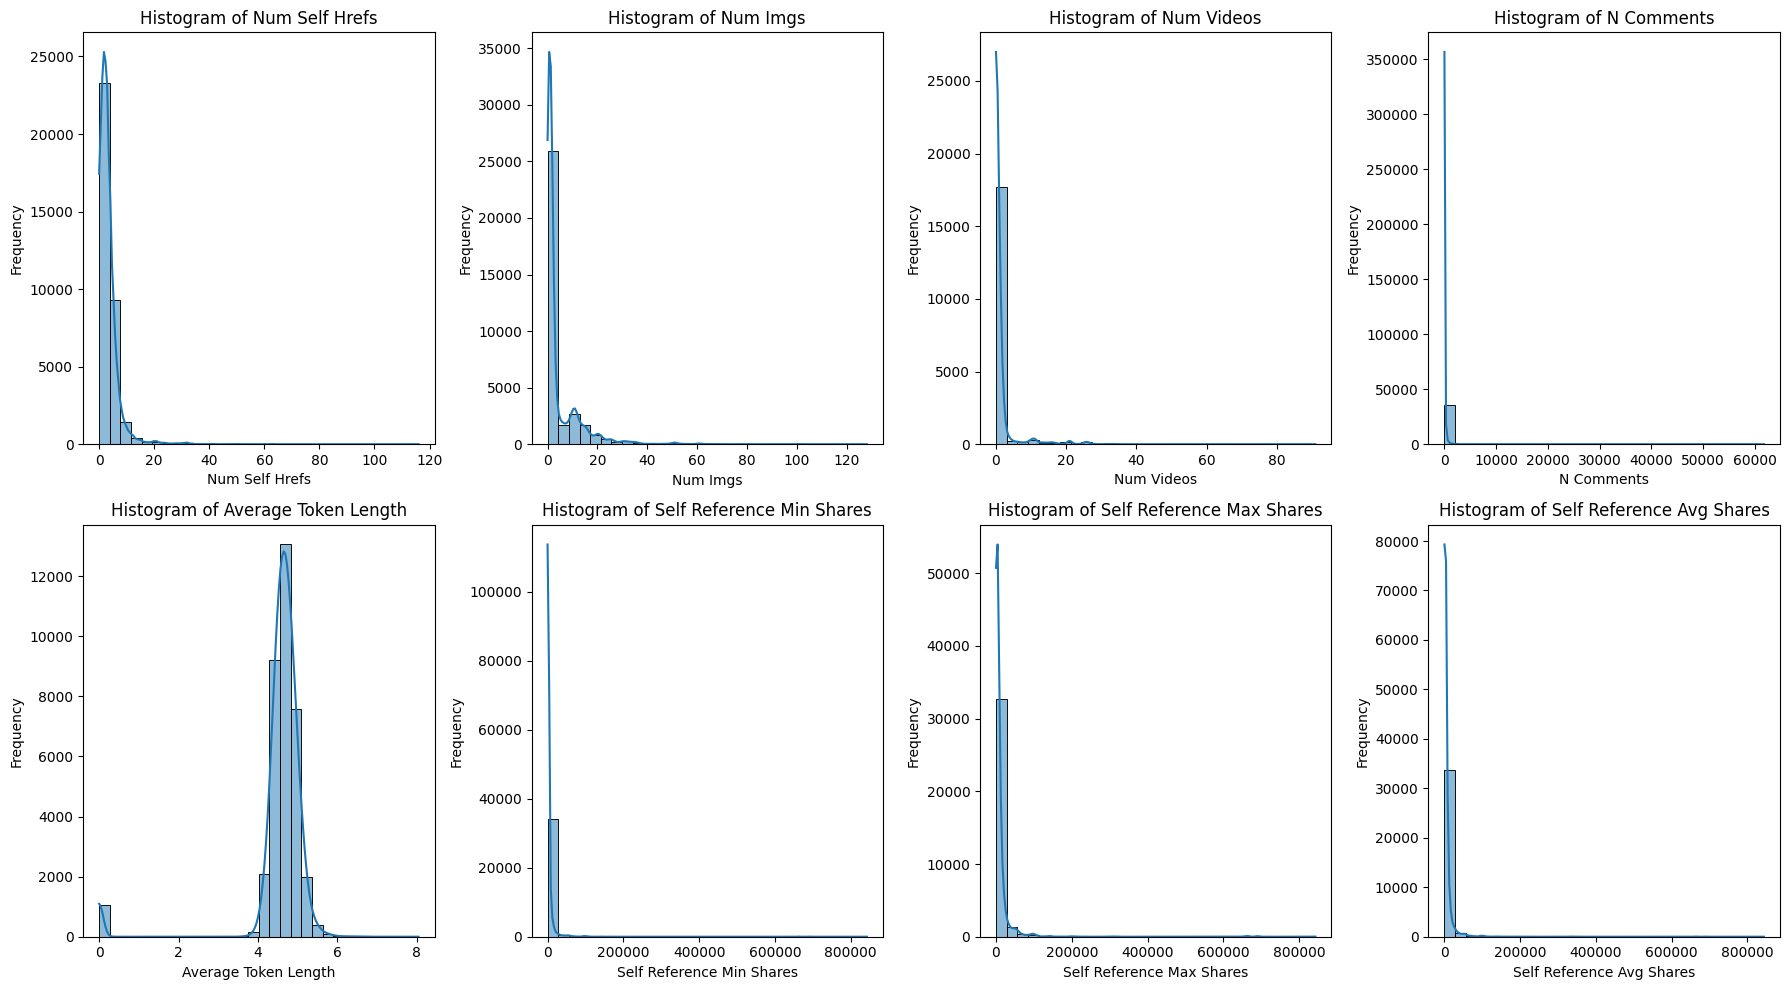

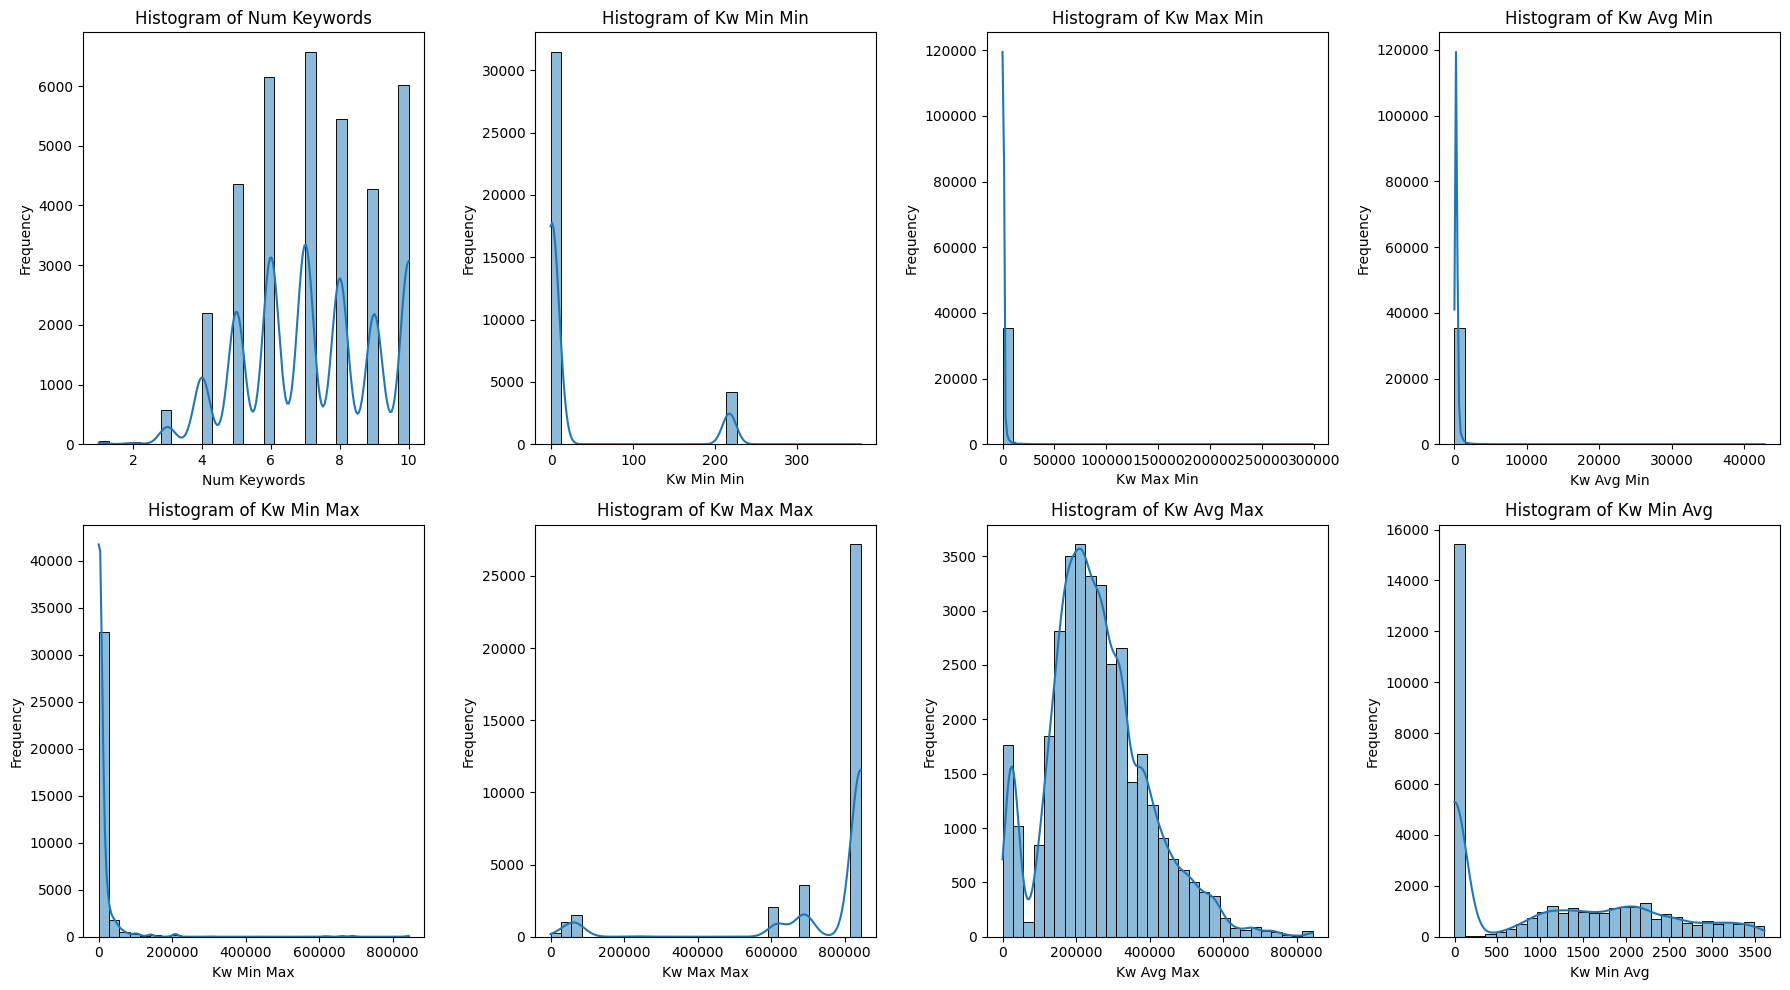

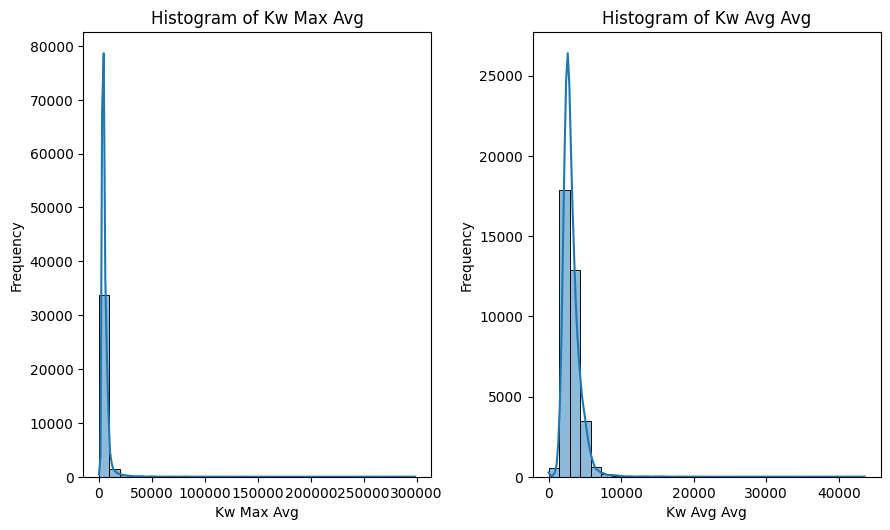


Numerical feature histograms complete.


In [9]:
# --- Histograms for All Numerical Features ---
print("\n--- Histograms for All Numerical Features ---")

if not numerical_features_for_outliers: # Reuse the same list of numerical features from outlier analysis
    print("\nNo numerical columns found for histogram visualization.")
else:
    # Use the same plotting parameters for consistency (4 columns, 2 rows per figure)
    n_cols_per_row = 4
    n_rows_per_figure = 2
    plots_per_figure = n_cols_per_row * n_rows_per_figure
    
    num_plots = len(numerical_features_for_outliers)
    num_figures = (num_plots + plots_per_figure - 1) // plots_per_figure

    for fig_idx in range(num_figures):
        plt.figure(figsize=(18, 5 * n_rows_per_figure)) # Adjust figure size
        
        start_idx = fig_idx * plots_per_figure
        end_idx = min(start_idx + plots_per_figure, num_plots)
        
        for i, col_idx in enumerate(range(start_idx, end_idx)):
            col = numerical_features_for_outliers[col_idx]
            subplot_position = i + 1
            
            plt.subplot(n_rows_per_figure, n_cols_per_row, subplot_position)
            sns.histplot(data=df, x=col, kde=True, bins=30) # kde=True adds a density curve
            plt.title(f'Histogram of {col.replace("_", " ").title()}')
            plt.xlabel(col.replace("_", " ").title())
            plt.ylabel('Frequency')
            
        plt.tight_layout()
        # plt.savefig(f'outlier_analysis_histograms_part_{fig_idx+1}.png') # Uncomment to save
        plt.show()

    print("\nNumerical feature histograms complete.")

## General Observations Across Histograms:
Many of the numerical features exhibit characteristics common in real-world, count-based, or value-based datasets, primarily:

### **Strong Right Skewness / Concentration at Low Values**

 A dominant pattern across most histograms (e.g., Num Self Hrefs, Num Imgs, Num Videos, N Comments, all Kw Min/Max and Avg related to shares) is a very high frequency at or near zero, with a long tail extending to the right. This indicates:

**Sparsity/Zero-Inflated Data**

 A large proportion of the articles have zero or very few instances of that feature (e.g., many articles have no self-references, no images, no videos, few comments).

**Presence of Outliers**

 The long right tails strongly suggest the presence of extreme outliers on the higher end, which can significantly skew statistical measures (mean, standard deviation) and potentially impact linear models if not handled.

Implication for Modeling: Such distributions often benefit immensely from logarithmic transformations like np.log1p; we will apply these transformations in data_preparation.py. This helps to reduce skewness, compress the range of values, and make the data more suitable for models that assume normally distributed or less skewed inputs.

### **Bimodal or Multimodal Distributions**

(Less Common, but Present):

**Num Keywords**

 This histogram appears to show a somewhat multimodal distribution with distinct peaks, rather than a smooth bell curve or extreme skew. There are clear modes around 3, 5-6, and potentially 8-9 keywords. This suggests that articles might naturally cluster into categories based on the number of associated keywords. This is an interesting pattern that might not require transformation but could indicate underlying categorical factors.




## Specific Feature Observations & Insights:

### Num Self Hrefs, Num Imgs, Num Videos, N Comments:

**Observations**

 All show extreme right skewness, with a huge peak at zero (or very low values) and very long tails. N Comments shows an almost entirely concentrated peak at the very beginning of the x-axis, with a few extreme values far to the right.

**Insight**

 The large number of zeros/low values confirms the need for log1p transformation, which effectively compresses these highly skewed features, allowing models to better discern differences among the smaller, more common values while still accounting for the rare large values.

### Num Keywords:

**Observations**

Distinct peaks are visible, indicating common groupings in the number of keywords used. This is less about "outliers" and more about inherent data structure.

**Insight**

This feature might benefit from being treated as a categorical feature (or binned into categories) if the distinct modes represent meaningful groupings. Its distribution does not scream for a log transformation in the same way the highly skewed features do.


### (All Keyword-related Share Metrics)

**Kw Min Min, Kw Max Min, Kw Avg Min, Kw Min Max, Kw Max Max, Kw Avg Max, Kw Min Avg, Kw Max Avg, Kw Avg Avg**

**Observations**

 Nearly all of these display very strong right skewness, similar to N Comments. A massive peak at the left (often near zero or the minimum possible value) and a very long, sparse tail. Kw Avg Avg and Kw Avg Max show slightly less extreme skewness compared to others like Kw Min Min, with a more discernible "bulk" of data before the long tail.

**Insight**

 This extreme skewness is expected as these represent share counts associated with keywords. Log transformation (or similar power transformations) will be critical for these features to normalize their distributions and ensure they don't disproportionately influence the model due to their vast range.

### Average Token Length

**Observations**

 This histogram appears to be more symmetric and less skewed than many others, possibly resembling a normal or slightly right-skewed distribution. The bulk of the data is centrally located.

**Insight**

 This feature might not require aggressive transformations as it's already relatively well-behaved. However, if the model benefits from all features being on a similar scale or distribution, a light transformation or standardization might still be considered.



## Overall Conclusion for Preprocessing:

The histograms strongly reinforce the importance of the log transformations already implemented in data_preparation.py script for features like shares, n_comments, and presumably many of the kw_* features. These transformations are vital for reducing the impact of extreme outliers and making the data distributions more Gaussian-like, which often improves the performance of many regression models (including XGBoost, Linear Regression, Random Forest, and Gradient Boosting).

For features like Num Keywords that show clear modes rather than strong skew, a different approach may help (e.g., treating them as discrete categories or using tree-based models that are inherently robust to such distributions).